<a href="https://colab.research.google.com/github/pmantoine4/PA_D_24/blob/main/FinalProject_SentimentAnnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Assignment
# We have ben tasked with completing a sentiment analysis based on an Apple-Twitter-Sentiment-DFE dataset published by Github. The analysis should contain: 1) EDA visualizations 2) Use of NLTK library 3) Comparison of 2 - 4 ML models

In [1]:
# Importing the necessary Libraries
import re
import pickle
import numpy as np
import pandas as pd

# nltk
import nltk
from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

In [2]:
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Loading the data
encoding = "ISO-8859-1"
dataset = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/NLP%20Projects/Apple-Twitter-Sentiment/Apple-Twitter-Sentiment-DFE.csv', encoding = encoding)

In [5]:
# To get the first view of the dataset
dataset.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,623495514,True,golden,12,NaN,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,623495515,True,golden,10,NaN,3,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...
3,623495516,True,golden,17,NaN,3,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...
4,623495517,False,finalized,3,12/12/14 12:14,3,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL


In [6]:
# To obtain the number of rows and columns in thee dataset
dataset.shape

(3886, 12)

In [7]:
# To get  infos regarding the data type contained in each column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _unit_id              3886 non-null   int64  
 1   _golden               3886 non-null   bool   
 2   _unit_state           3886 non-null   object 
 3   _trusted_judgments    3886 non-null   int64  
 4   _last_judgment_at     3783 non-null   object 
 5   sentiment             3886 non-null   object 
 6   sentiment:confidence  3886 non-null   float64
 7   date                  3886 non-null   object 
 8   id                    3886 non-null   float64
 9   query                 3886 non-null   object 
 10  sentiment_gold        103 non-null    object 
 11  text                  3886 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 337.9+ KB


In [8]:
# To verify the presence of missing values in the dataset. The '_last_judgment_at' columnn contains 103 missing values and the 'sentiment_gold' columnn containns 3783 missing values.
dataset.isnull().sum()

_unit_id                   0
_golden                    0
_unit_state                0
_trusted_judgments         0
_last_judgment_at        103
sentiment                  0
sentiment:confidence       0
date                       0
id                         0
query                      0
sentiment_gold          3783
text                       0
dtype: int64

In [9]:
# To determine  unique values in the '_last_judgment_at' column
dataset['_last_judgment_at'].unique()

array([nan, '12/12/14 12:14', '12/12/14 0:52', '12/12/14 21:38',
       '12/12/14 15:50', '12/12/14 3:38', '12/12/14 4:59',
       '12/12/14 20:59', '12/11/14 20:31', '12/12/14 8:36',
       '12/12/14 14:08', '12/12/14 8:42', '12/12/14 18:31',
       '12/12/14 2:33', '12/12/14 0:01', '12/11/14 23:40',
       '12/12/14 9:10', '12/12/14 21:02', '12/11/14 9:47',
       '12/11/14 14:07', '12/12/14 9:26', '12/12/14 14:51',
       '12/12/14 3:33', '12/11/14 22:17', '12/11/14 21:20',
       '12/11/14 20:50', '12/11/14 21:21', '12/12/14 20:51',
       '12/12/14 1:20', '12/12/14 2:08', '12/12/14 2:28',
       '12/12/14 22:25', '12/12/14 17:48', '12/12/14 8:52',
       '12/11/14 20:59', '12/12/14 11:16', '12/11/14 20:54',
       '12/12/14 20:54', '12/11/14 22:10', '12/12/14 2:39',
       '12/12/14 9:14', '12/12/14 9:16', '12/12/14 13:02',
       '12/12/14 3:17', '12/12/14 1:13', '12/11/14 18:38',
       '12/11/14 18:42', '12/12/14 7:04', '12/12/14 2:23',
       '12/12/14 19:56', '12/12/14 0:00',

In [10]:
# To determine  unique values in the 'sentiment_gold' column
dataset['sentiment_gold'].unique()

array(['3\nnot_relevant', '3\n1', '3', nan, '5', '5\n3', '1', '5\n3\n1',
       '3\n1\nnot_relevant', '5\n3\nnot_relevant'], dtype=object)

In [11]:
# To filter out the '_last_judgment_at' and 'sentiment_gold' columns from the dataset
dataset = dataset[['_unit_id','_golden','_unit_state','_trusted_judgments','sentiment','sentiment:confidence','date','id','query','text']]

In [12]:
# To verify that these columns are no longer present in the dataset
dataset.head()


,_unit_id,_golden,_unit_state,_trusted_judgments,sentiment,sentiment:confidence,date,id,query,text
0,623495513,True,golden,10,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,623495514,True,golden,12,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,623495515,True,golden,10,3,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,My cat only chews @apple cords. Such an #Apple...
3,623495516,True,golden,17,3,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,I agree with @jimcramer that the #IndividualIn...
4,623495517,False,finalized,3,3,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,Nobody expects the Spanish Inquisition #AAPL


In [13]:
# Checking for duplicates in the dataset. No duplicates detected.
dataset.duplicated().sum()

0

In [14]:
#Checking for missing values in the dataset
dataset.isnull().sum()

_unit_id                0
_golden                 0
_unit_state             0
_trusted_judgments      0
sentiment               0
sentiment:confidence    0
date                    0
id                      0
query                   0
text                    0
dtype: int64

In [15]:
# To determine  unique values in the '_unit_id' column
dataset['_unit_id'].unique()

array([623495513, 623495514, 623495515, ..., 623499486, 623499514,
       623517290])

In [16]:
# To determine  unique values in the '_golden' column
dataset['_golden'].unique()

array([ True, False])

In [17]:
# To determine  unique values in the '_unit_state' column
dataset['_unit_state'].unique()

array(['golden', 'finalized'], dtype=object)

In [18]:
# To determine  unique values in the '_trusted_judgments' column
dataset['_trusted_judgments'].unique()

array([10, 12, 17,  3, 13,  9, 15, 11,  6, 16,  4, 14, 18,  5, 27,  8,  7,
       22, 19])

In [19]:
# To determine  unique values in the 'sentiment' column
dataset['sentiment'].unique()

array(['3', '5', '1', 'not_relevant'], dtype=object)

In [20]:
# To determine  unique values in the 'sentiment:confidence' column
dataset['sentiment:confidence'].unique()

array([0.6264, 0.8129, 1.    , 0.5848, 0.6474, 0.5975, 0.8468, 0.6736,
       0.7997, 0.636 , 0.6658, 0.8381, 0.4798, 0.9399, 0.6904, 0.6621,
       0.7244, 0.6552, 0.8928, 0.8558, 0.8701, 0.5724, 0.7179, 0.6604,
       0.6515, 0.4673, 0.7453, 0.665 , 0.501 , 0.6672, 0.6868, 0.6656,
       0.7408, 0.732 , 0.7177, 0.6788, 0.6731, 0.7011, 0.7321, 0.8214,
       0.6398, 0.6759, 0.5327, 0.6527, 0.6783, 0.7556, 0.4791, 0.7591,
       0.6676, 0.7039, 0.6908, 0.6517, 0.6794, 0.7851, 0.6218, 0.6884,
       0.6573, 0.7279, 0.6734, 0.6442, 0.6697, 0.6635, 0.7287, 0.7079,
       0.5409, 0.6624, 0.7053, 0.6894, 0.5288, 0.6806, 0.6864, 0.5339,
       0.681 , 0.5098, 0.718 , 0.6544, 0.6373, 0.4978, 0.6816, 0.7206,
       0.6518, 0.6491, 0.6765, 0.6827, 0.8539, 0.6882, 0.679 , 0.7284,
       0.7248, 0.667 , 0.6826, 0.7651, 0.6758, 0.6681, 0.7016, 0.6538,
       0.9144, 0.6631, 0.532 , 0.6387, 0.4806, 0.6678, 0.7364, 0.7119,
       0.7201, 0.6861, 0.7089, 0.7253, 0.7263, 0.734 , 0.6774, 0.6613,
      

In [21]:
# To determine  unique values in the 'date' column
dataset['date'].unique()

array(['Mon Dec 01 19:30:03 +0000 2014', 'Mon Dec 01 19:43:51 +0000 2014',
       'Mon Dec 01 19:50:28 +0000 2014', ...,
       'Tue Dec 09 22:18:27 +0000 2014', 'Tue Dec 09 23:45:59 +0000 2014',
       'Wed Dec 10 00:48:10 +0000 2014'], dtype=object)

In [22]:
# To determine  unique values in the 'id' column
dataset['id'].unique()

array([5.40e+17, 5.41e+17, 5.42e+17])

In [23]:
# To determine  unique values in the 'query' column
dataset['query'].unique()

array(['#AAPL OR @Apple'], dtype=object)

In [24]:
# To determine  unique values in the 'text' column
dataset['text'].unique()

array(['#AAPL:The 10 best Steve Jobs emails ever...http://t.co/82G1kL94tx',
       'RT @JPDesloges: Why AAPL Stock Had a Mini-Flash Crash Today $AAPL #aapl\nhttp://t.co/hGFcjYa0E9',
       'My cat only chews @apple cords. Such an #AppleSnob.', ...,
       'RT @MMLXIV: there is no avocado emoji may I ask why @apple',
       '@marcbulandr I could not agree more. Between @Apple @Twitter and @IBMWatson only great things will happen. #AppleandIBM #IBMandTwitter',
       "My iPhone 5's photos are no longer downloading automatically to my laptop when I sync it. @apple support is unhelpful. Any ideas?"],
      dtype=object)

In [25]:
# To count the values per sentiment category
dataset['sentiment'].value_counts()

sentiment
3               2162
1               1219
5                423
not_relevant      82
Name: count, dtype: int64

<ipython-input-26-c691cff511b3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=dataset, palette='RdBu_r')


<Axes: xlabel='sentiment', ylabel='count'>

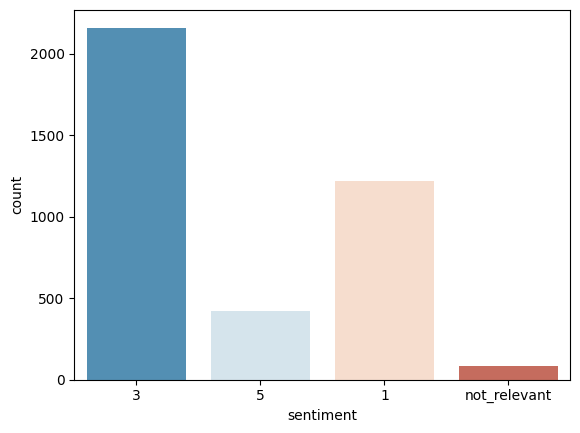

In [26]:
# To visualize the data of the sentiment column
sns.countplot(x='sentiment', data=dataset, palette='RdBu_r')

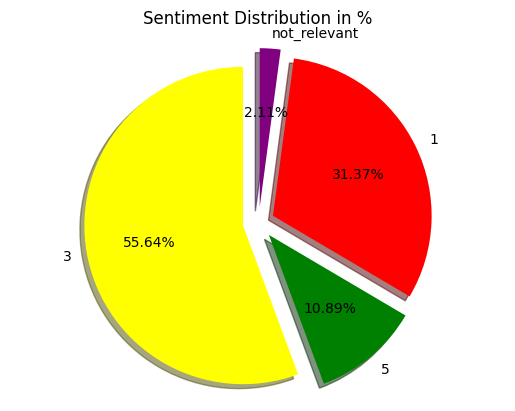

In [28]:
# @title Default title text
#To visualize, using a pie chart, the representation in percentage of all types of sentiments.
labels = ['3', '5','1','not_relevant']


colors=['yellow','green', 'red','purple']

sizes= [2162, 423, 1219, 82]

# Adjusted the explode tuple to match the length of sizes
plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0.1, 0.1, 0.1, 0.1), autopct='%1.2f%%')

plt.title('Sentiment Distribution in %')

plt.axis('equal')

plt.show()

In [29]:
#dataset['_golden'].value_counts

<ipython-input-31-33ee4580af61>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='_golden', data=dataset, palette='RdBu_r')


<Axes: xlabel='_golden', ylabel='count'>

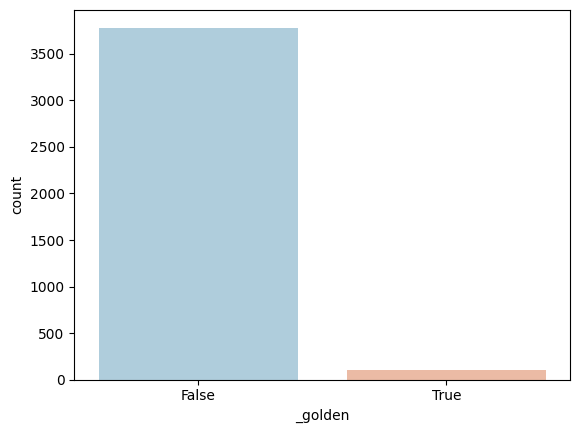

In [31]:
#To visualize the '_golden' column
sns.countplot(x='_golden', data=dataset, palette='RdBu_r')

In [30]:
#dataset['sentiment:confidence'].value_counts()

array([[<Axes: title={'center': '_unit_id'}>,
        <Axes: title={'center': '_trusted_judgments'}>],
       [<Axes: title={'center': 'sentiment:confidence'}>,
        <Axes: title={'center': 'id'}>]], dtype=object)

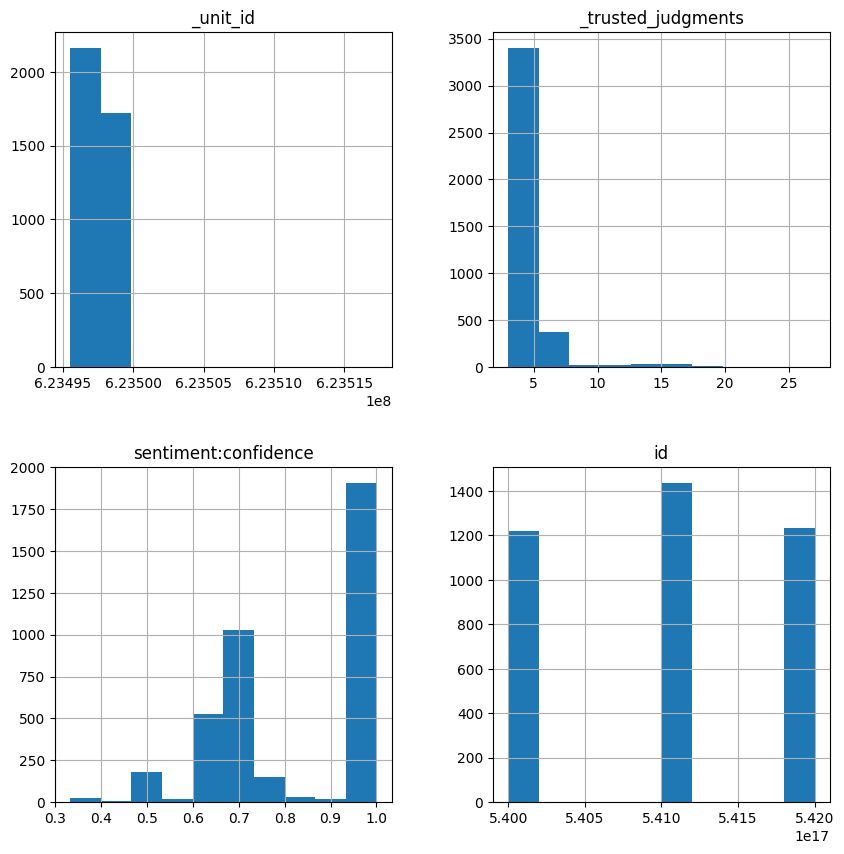

In [33]:
# A histogram of the dataset featuring the columns with numerical values
dataset.hist(figsize=(10,10))

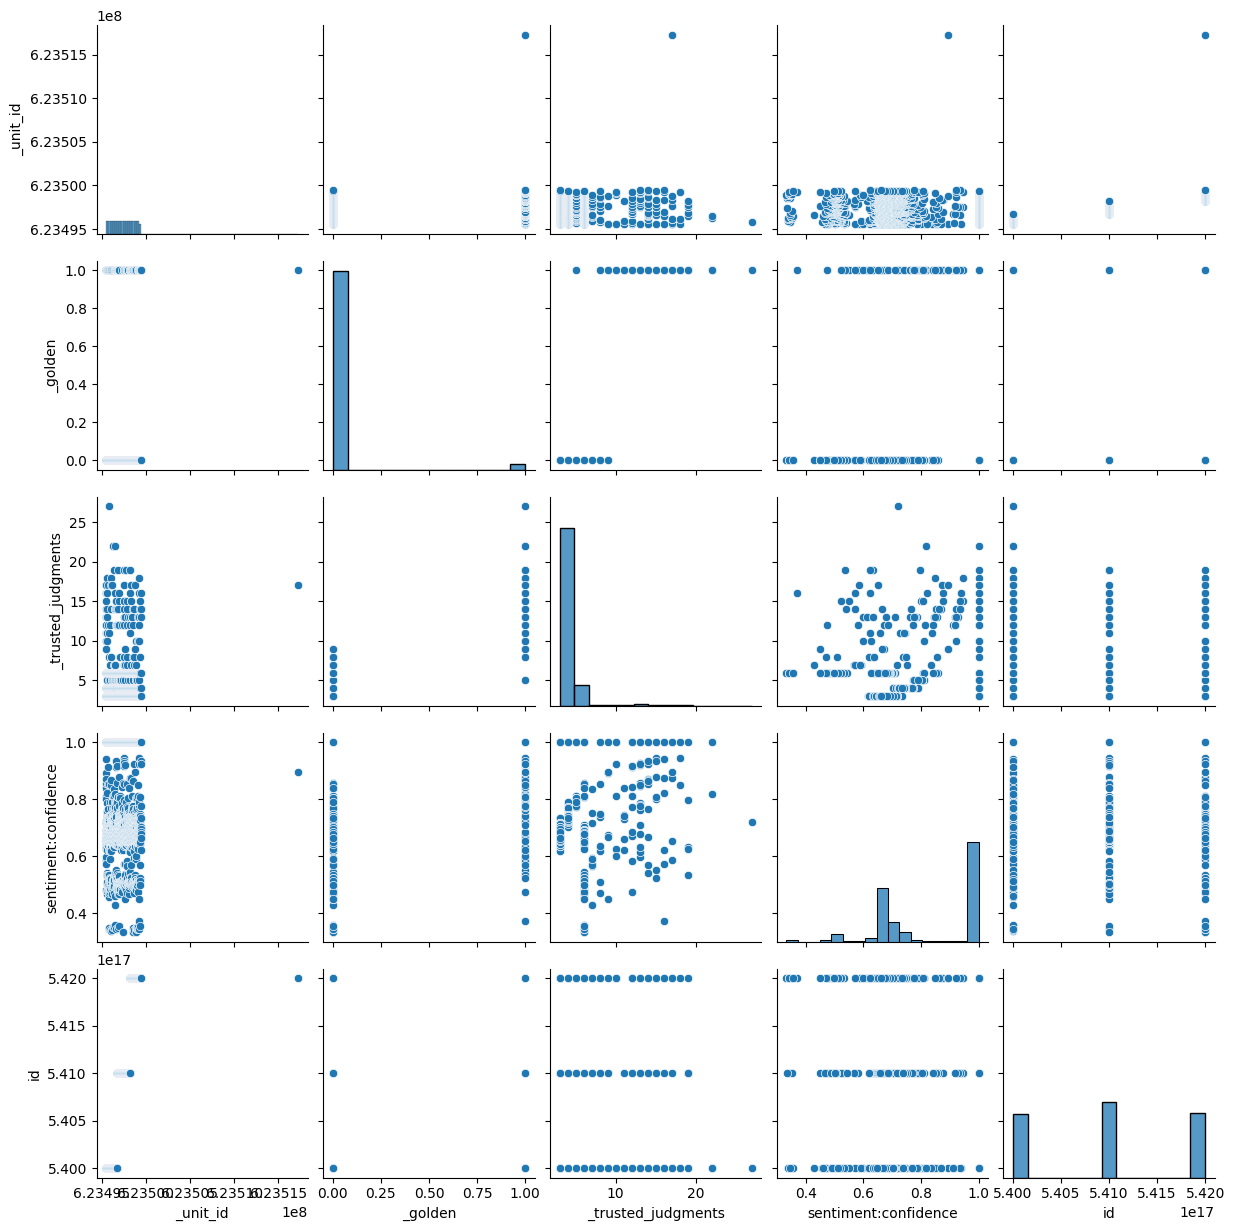

In [32]:
#A paiplot visualization of the dataset. Pairplot allows us to see both the distribution and the relationships between two variables. Five columns aree represented.

sns.pairplot(dataset)

<Axes: >

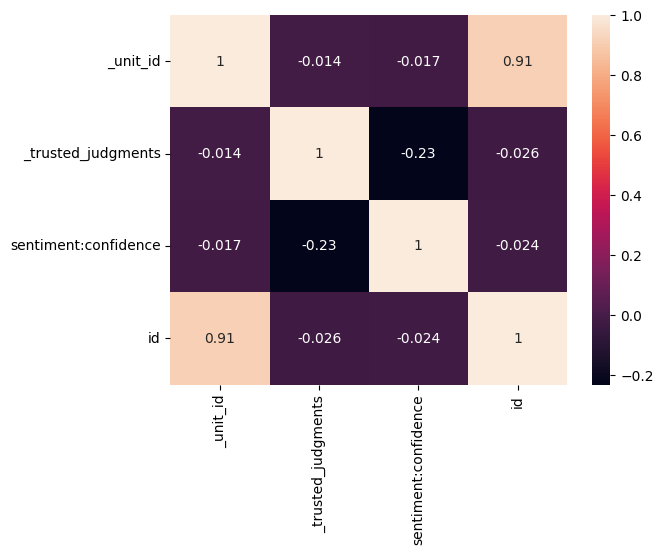

In [33]:
# Select only numeric columns for correlation analysis
numeric_dataset = dataset.select_dtypes(include=['number'])

# Compute and visualize the correlation matrix
sns.heatmap(numeric_dataset.corr(), annot=True)

<ipython-input-34-f63a95612a79>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='sentiment:confidence', data=dataset, palette='RdBu_r')


<Axes: xlabel='sentiment', ylabel='sentiment:confidence'>

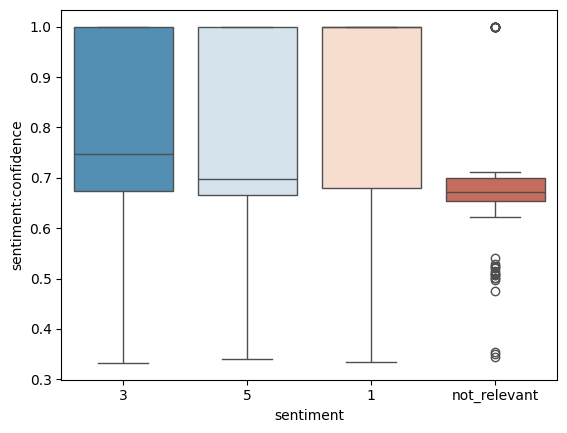

In [34]:
#Visualizing relationship beetween sentiment and sentiment:connfidence using a boxplot
sns.boxplot(x='sentiment', y='sentiment:confidence', data=dataset, palette='RdBu_r')

<ipython-input-35-957f98d3f514>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='sentiment', y='sentiment:confidence', data=dataset, palette='RdBu_r')
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 89.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 67.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 85.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dis

<Axes: xlabel='sentiment', ylabel='sentiment:confidence'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 89.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 66.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 84.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


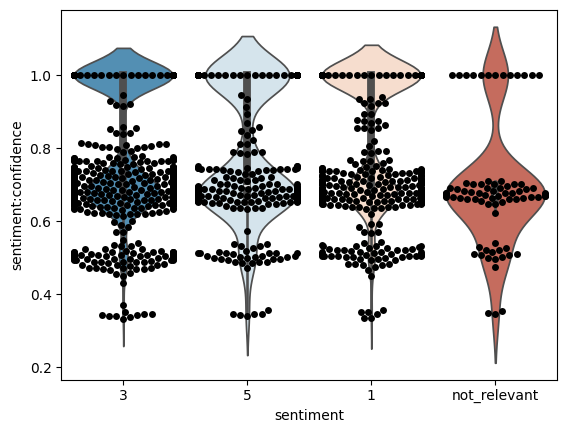

In [35]:
#A combined visualization  featuring sentiment and sentiment:confidence
sns.violinplot(x='sentiment', y='sentiment:confidence', data=dataset, palette='RdBu_r')
sns.swarmplot(x='sentiment', y='sentiment:confidence', data=dataset, color='black')

In [36]:
#Removing unnecessary columns for the sentiment analysis, keeping only the 'sentiment' and 'text' columns.
dataset = dataset[['sentiment', 'text']] # Select columns by their names

In [40]:
#dropping the rows with value equal to not_relevant in the sentiment column
dataset = dataset[dataset['sentiment'] != 'not_relevant'] # Uncomment this line to remove the problematic rows

# Converting the sentiment values from object datatype into numeric ones
dataset['sentiment'] = pd.to_numeric(dataset['sentiment']) # Now apply to_numeric

<ipython-input-40-6742f35837cb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['sentiment'] = pd.to_numeric(dataset['sentiment']) # Now apply to_numeric


In [41]:
#To verify that 'not_relevant' is no more part of 'sentiment' column values
dataset['sentiment'].unique()

array([3, 5, 1])

In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3804 entries, 0 to 3885
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  3804 non-null   int64 
 1   text       3804 non-null   object
dtypes: int64(1), object(1)
memory usage: 89.2+ KB


In [43]:
dataset.head(20)

,sentiment,text
0,3,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,3,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,3,My cat only chews @apple cords. Such an #Apple...
3,3,I agree with @jimcramer that the #IndividualIn...
4,3,Nobody expects the Spanish Inquisition #AAPL
5,3,#AAPL:5 Rocket Stocks to Buy for December Gain...
6,5,Top 3 all @Apple #tablets. Damn right! http://...
7,5,CNBCTV: #Apple's margins better than expected?...
8,3,Apple Inc. Flash Crash: What You Need to Know ...
9,3,#AAPL:This Presentation Shows What Makes The W...


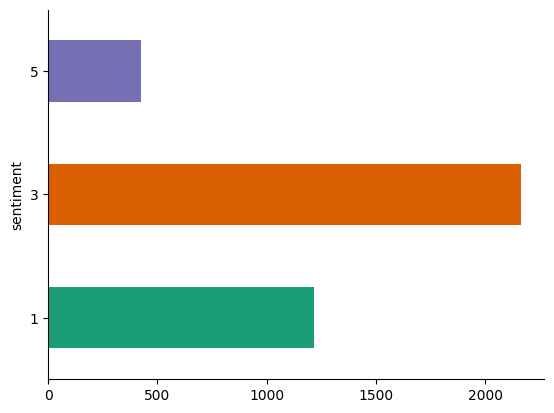

In [82]:
# @title sentiment

#To visualize the sentiment column after filtering out 'not_relevant' values
dataset.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

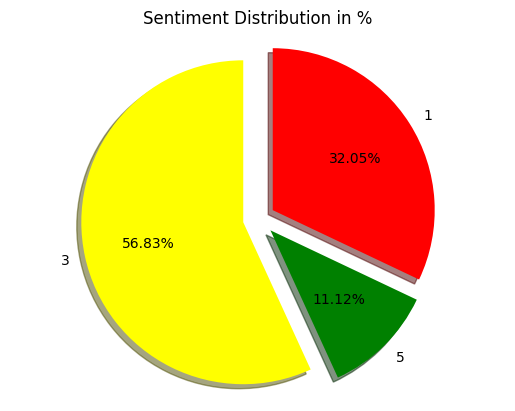

In [81]:
# @title Default title text
#To visualize, using a pie chart, the sentiment column after filtering out 'not_relevant' values
labels = ['3', '5','1',]


colors=['yellow','green', 'red']

sizes= [2162, 423, 1219]

# Adjusted the explode tuple to match the length of sizes
plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0.1, 0.1, 0.1), autopct='%1.2f%%')

plt.title('Sentiment Distribution in %')

plt.axis('equal')

plt.show()

In [46]:
#Storing data in lists
sentiment, text = list(dataset['sentiment']), list(dataset['text'])


In [47]:
#Manually defining dictionary containing all emojis with their. meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed',
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink',
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

In [48]:
#Manually defining set containing all stopwords in english.
stopwords = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [49]:
lemmtizer = WordNetLemmatizer()
# grouping together the inflected forms ("better" -> "good")

In [50]:
#Precessing our text data. It is extremely important that we preprocess our data before feeding it into our model.
def preprocess(textdata):
    processed_texts = []

    # Defining regex patterns
    url_pattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)" # Fixed indentation
    user_pattern = '@[^\s]+'
    alpha_pattern = "[^a-zA-Z0-9]"
    sequence_pattern = r"(.)\1\1+"
    seq_replace_pattern = r"\1\1"

    for tweet in textdata:
        tweet = tweet.lower()

        # Replace all URLs with 'URL'
        tweet = re.sub(url_pattern, ' URL', tweet)
        # Replace all emojis
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])
        # Replace @USERNAME to 'USER'
        tweet = re.sub(user_pattern, ' USER', tweet)
        # Replace all non-alphabets
        tweet = re.sub(alpha_pattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter
        tweet = re.sub(sequence_pattern, seq_replace_pattern, tweet)

        preprocessed_words = []
        for word in tweet.split():
            # Check if the word is a stopword
            if len(word) > 1 and word not in stopwords:
                # Lemmatizing the word
                word = lemmtizer.lemmatize(word)
                preprocessed_words.append(word)

        processed_texts.append(' '.join(preprocessed_words))

    return processed_texts

Explanation:

Install NLTK: We first install the NLTK library using pip if it's not already installed.
Import nltk: We import the nltk module to access its functionalities.
Download WordNet: We use nltk.download('wordnet') to download the WordNet corpus, which is necessary for lemmatization.
After running these commands, the WordNetLemmatizer should be able to find the required corpus, and your code should execute without the LookupError.

In [52]:
processed_text = preprocess(text)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(processed_text, sentiment, test_size=0.05, random_state=0)


In [54]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectorizer.fit(X_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [55]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [56]:
def model_evaluate(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

In [57]:
#To train and evaluate LRmodel
LRmodel = LogisticRegression(C=2, max_iter=1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_evaluate(LRmodel)

              precision    recall  f1-score   support

           1       0.85      0.65      0.73        51
           3       0.78      0.95      0.86       117
           5       0.60      0.26      0.36        23

    accuracy                           0.79       191
   macro avg       0.74      0.62      0.65       191
weighted avg       0.78      0.79      0.76       191



In [58]:
#To train and evaluate SVCmodel
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_evaluate(SVCmodel)

              precision    recall  f1-score   support

           1       0.82      0.65      0.73        51
           3       0.77      0.90      0.83       117
           5       0.40      0.26      0.32        23

    accuracy                           0.75       191
   macro avg       0.67      0.60      0.62       191
weighted avg       0.74      0.75      0.74       191



In [59]:
#To train and evaluate BNBmodel model
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_evaluate(BNBmodel)

              precision    recall  f1-score   support

           1       0.89      0.63      0.74        51
           3       0.74      0.97      0.84       117
           5       1.00      0.04      0.08        23

    accuracy                           0.77       191
   macro avg       0.88      0.55      0.55       191
weighted avg       0.81      0.77      0.72       191



In [60]:
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier
#Training and evaluating DecisionTreeClassifiermodel
DecisionTreeClassifiermodel = DecisionTreeClassifier()
DecisionTreeClassifiermodel.fit(X_train, y_train)
model_evaluate(DecisionTreeClassifiermodel)

              precision    recall  f1-score   support

           1       0.65      0.59      0.62        51
           3       0.75      0.86      0.80       117
           5       0.64      0.30      0.41        23

    accuracy                           0.72       191
   macro avg       0.68      0.59      0.61       191
weighted avg       0.71      0.72      0.71       191



In [61]:
from sklearn.naive_bayes import ComplementNB # Import ComplementNB
#Training and evaluating ComplementNBmodel
ComplementNBmodel = ComplementNB()
ComplementNBmodel.fit(X_train, y_train)
model_evaluate(ComplementNBmodel)

              precision    recall  f1-score   support

           1       0.77      0.78      0.78        51
           3       0.82      0.87      0.84       117
           5       0.50      0.30      0.38        23

    accuracy                           0.78       191
   macro avg       0.70      0.65      0.67       191
weighted avg       0.77      0.78      0.77       191



In [63]:
X_train, X_test, y_train, y_test = train_test_split(processed_text, sentiment, test_size=0.05, random_state=42)

In [67]:
pipe = Pipeline([('vectorizer', vectorizer), ('model', LogisticRegression())]) # Instantiate LogisticRegression
pipe.fit(X_train, y_train)

model_evaluate(pipe)

              precision    recall  f1-score   support

           1       0.70      0.60      0.65        55
           3       0.76      0.90      0.83       115
           5       0.57      0.19      0.29        21

    accuracy                           0.74       191
   macro avg       0.68      0.56      0.59       191
weighted avg       0.72      0.74      0.71       191



In [68]:
def predict(model, text):
    # Predict the sentiment
    processed_text = preprocess(text)
    predictions = model.predict(processed_text)

    # Define a dictionary to map numerical predictions to sentiment labels
    pred_to_label = {1: 'Negative', 3: 'Neutral', 5: 'Positive'}

    #Make a list of list of text with sentiment.
    data = []
    for t, pred in zip(text, predictions):
      data.append((t, pred, pred_to_label[pred]))


    return data # Move the return statement outside the loop to return all predictions


Making predictions

In [69]:
text = ["Nobody expects the Spanish Inquisition #AAPL"]

In [70]:
predictions = predict(pipe, text)
print(predictions)

[('Nobody expects the Spanish Inquisition #AAPL', 3, 'Neutral')]


In [71]:
text = ['#AAPL:The 10 best Steve Jobs emails ever...htt...']

In [72]:
predictions = predict(pipe, text)
print(predictions)

[('#AAPL:The 10 best Steve Jobs emails ever...htt...', 3, 'Neutral')]


In [73]:
text = ['Top 3 all @Apple #tablets. Damn right! http://...']

In [74]:
predictions = predict(pipe, text)
print(predictions)

[('Top 3 all @Apple #tablets. Damn right! http://...', 3, 'Neutral')]


In [75]:
text = ['WTF MY BATTERY WAS 31% ONE SECOND AGO AND NOW ...']

In [76]:
predictions = predict(pipe, text)
print(predictions)

[('WTF MY BATTERY WAS 31% ONE SECOND AGO AND NOW ...', 1, 'Negative')]


In [77]:
text = ['The JH Hines Staff with their newly issued @ap...']

In [78]:
predictions = predict(pipe, text)
print(predictions)

[('The JH Hines Staff with their newly issued @ap...', 3, 'Neutral')]


Conclusion:

We. carried out five (5) predictions, four (4) are correct. The prediction result regarding the tweet in the 7th line (6) is incorrect. This gives 80% success in line with the accuracy of LogisticRegression (0.79) when trained. This model was used to make the predictions.